## Testing iPyStata
This is a little test of how to use Stata going through a Jupyter Notebook. To have a guideline of iPyStata setting up see https://github.com/TiesdeKok/ipystata.git.

In [42]:
import pandas as pd

In [43]:
import ipystata

In [78]:
%%stata -o car_df
sysuse auto.dta

(1978 Automobile Data)



In [79]:
car_df.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic


In [80]:
%%stata -d car_df
tab foreign headroom


           |                                        headroom
   foreign |       1.5          2        2.5          3        3.5          4        4.5          5 |     Total
-----------+----------------------------------------------------------------------------------------+----------
  Domestic |         3         10          4          7         13         10          4          1 |        52 
   Foreign |         1          3         10          6          2          0          0          0 |        22 
-----------+----------------------------------------------------------------------------------------+----------
     Total |         4         13         14         13         15         10          4          1 |        74 



In [81]:
pd.crosstab(car_df['foreign'], car_df['headroom'], margins=True)

headroom,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,All
foreign,,,,,,,,,
Domestic,3,10,4,7,13,10,4,1,52
Foreign,1,3,10,6,2,0,0,0,22
All,4,13,14,13,15,10,4,1,74


(1978 Automobile Data)



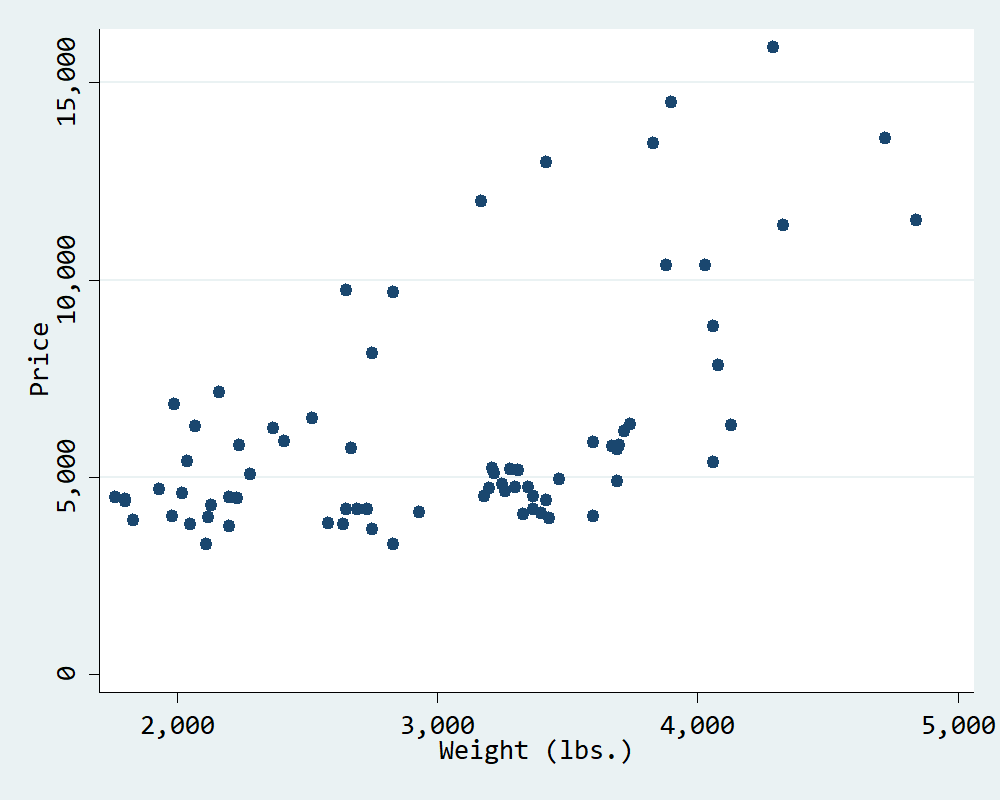

In [82]:
%%stata -s graph_session
sysuse auto.dta
scatter price weight

In [84]:
main_var = ['mpg', 'rep78']
control_var = ['gear_ratio', 'trunk', 'weight', 'displacement']

In [85]:
%%stata -i main_var -i control_var -os

display "`main_var'"
display "`control_var'"

regress price `main_var' `control_var', vce(robust)


mpg rep78

gear_ratio trunk weight displacement

Linear regression                               Number of obs     =         69
                                                F(6, 62)          =       8.60
                                                Prob > F          =     0.0000
                                                R-squared         =     0.4124
                                                Root MSE          =     2338.1

------------------------------------------------------------------------------
             |               Robust
       price |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         mpg |  -76.95578   84.95038    -0.91   0.369    -246.7692     92.8576
       rep78 |   899.0818   299.7541     3.00   0.004      299.882    1498.282
  gear_ratio |   1479.744   917.5363     1.61   0.112    -354.3846    3313.873
       trunk |  -110.3163   80.16622    -1.3

In [86]:
%%stata -o car_df -np
generate weight_squared = weight^2
generate log_weight = log(weight)

In [87]:
car_df.head(3)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,weight_squared,log_weight
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic,8584900.0,7.982758
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic,11222500.0,8.116715
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic,6969600.0,7.878534


In [88]:
%%stata -s macro_example -gm macro_1 -gm macro_2
local macro_1 one two
local macro_2 three four

Several (2x) macros have been added to the dictionary: macro_dict


In [89]:
macro_dict

{'macro_1': ['one', 'two'], 'macro_2': ['three', 'four']}

In [90]:
macro_dict['macro_1']

['one', 'two']

In [91]:
import os
os.chdir(r'C:/')

In [92]:
%%stata -cwd
display "`c(pwd)'"

Set the working directory of Stata to: C:\


In [93]:
%%stata
sessions

The following sessions have been found:
main [active]
graph_session [active]
macro_example [active]


In [94]:
%%stata
reveal all

Revealed 3 Stata sessions.


In [95]:
%%stata
close all

Terminated 0 running Stata processes
